In [55]:
#!/home/mlfrantz/miniconda3/bin/python3.7

"""
This code is specifically for plotting the results of my research testing.
"""

import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pdb
from scipy import stats

def normalized(x, **kws):
    # This function scales the data between 0-1. the 'index' variable is to select
    # a specific time frame to normalize to.
    x_min = np.min(x)
    x_max = np.max(x)
    return (x - x_min) / (x_max - x_min)

dataPath = 'data/budget_test_all.csv'
# dataPath = 'data/constraint_test_all.csv'
# dataPath = 'data/single_constraint_compare.csv'

file_path = os.path.join(os.path.abspath('..'), dataPath)
df = pd.read_csv(file_path)
nsewConstraint = ['Algorithm', 'Start', 'Score', 'Run_Time_(sec)', 'Budget_hours', 'Constraints']
df = df.filter(nsewConstraint)

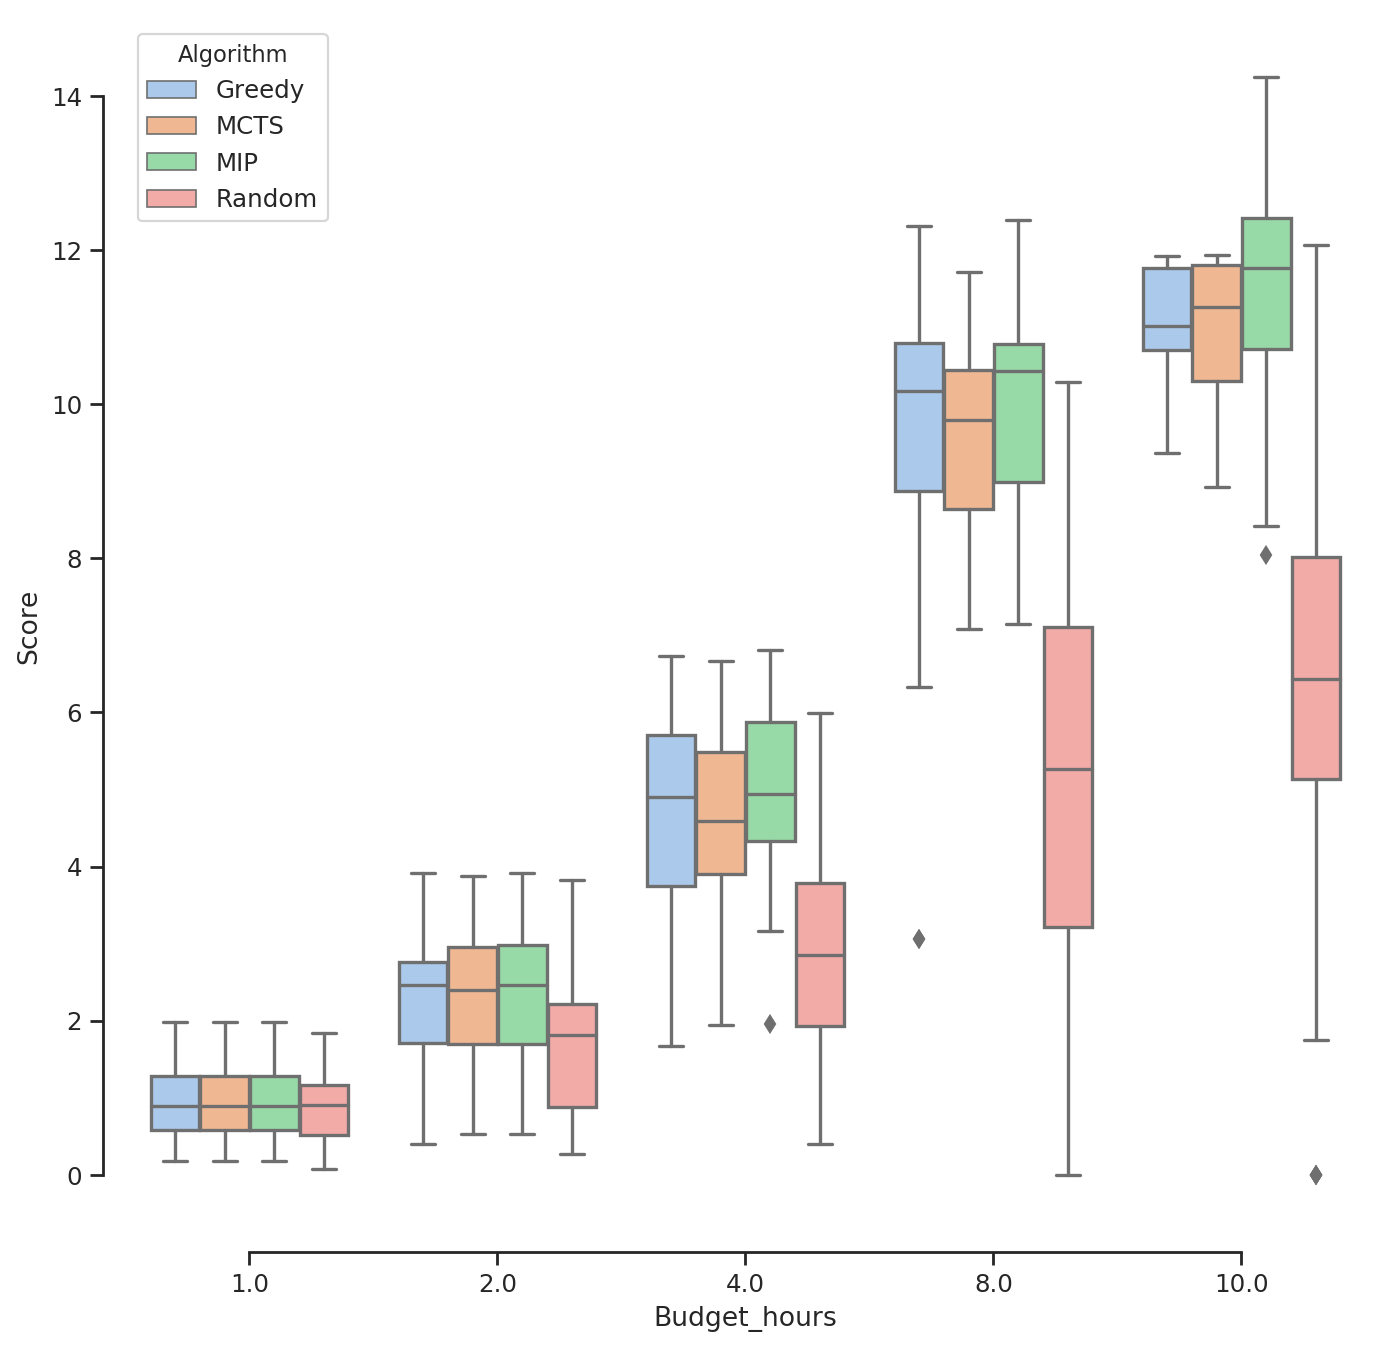

In [3]:
# This is a cat and wiskers plot

fig = plt.figure(figsize=(10,10), dpi=160, facecolor='w')
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Budget_hours", y="Score",
            hue="Algorithm", data=df.query("Budget_hours < 12"))
sns.despine(offset=10, trim=True)

plt.show()

/home/frantz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/frantz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


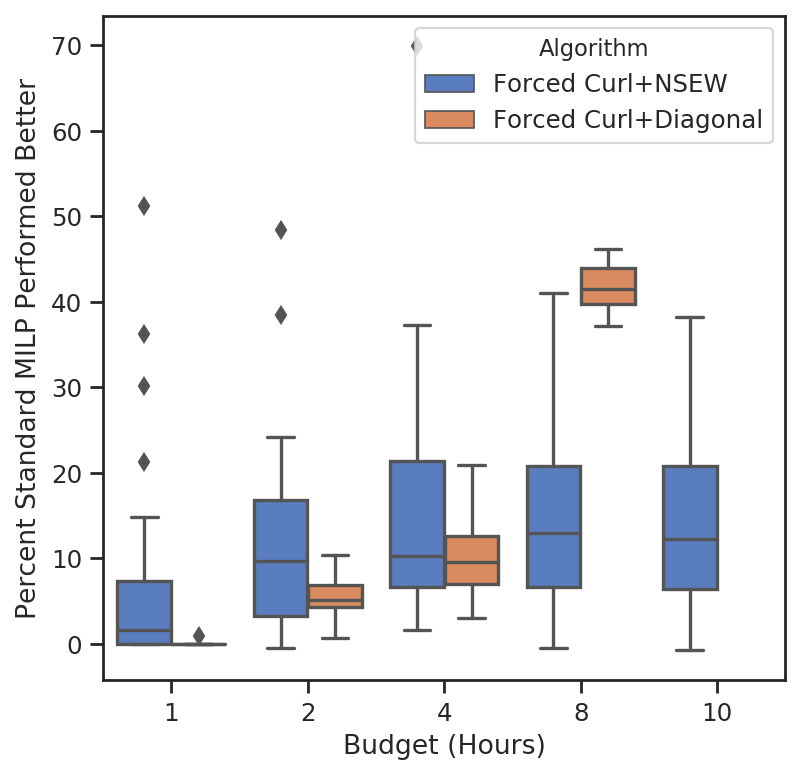

In [62]:
# Used for comparison for all algorithms
# dataPath = 'data/budget_test_all.csv'
# dataPath = 'data/constraint_test_all.csv'
# dataPath = 'data/constraint_test_force_curl.csv'
dataPath= 'data/team_test_heterogenous_2.csv'

file_path = os.path.join(os.path.abspath('..'), dataPath)
df = pd.read_csv(file_path)
nsewConstraint = ['Algorithm', 'Map_Center', 'Start', 'Score', 'Run_Time_(sec)', 'Budget_hours', 'Constraints']
df = df.filter(nsewConstraint)

# mip = df.query("Algorithm == 'MIP' and Constraints == '_diag'")
# mcts = df.query("Algorithm == 'MCTS' and Constraints == '_diag'")
# greedy = df.query("Algorithm == 'Greedy' and Constraints == '_diag'")
# random_alg = df.query("Algorithm == 'Random'")

# This is forced curl testing
# mip = df.query("Constraints == 'none'")
# nsew = df.query("Constraints == '_nsew_forceCurl'")
# diag = df.query("Constraints == '_diag_forceCurl'")
# algorithms = [nsew, diag]

# This is forced heterogenous team testing

mip = df.query("Algorithm == 'MIP' and Constraints == '_diag'")
mcts = df.query("Algorithm == 'MCTS' and Constraints == '_diag'")
greedy = df.query("Algorithm == 'Greedy' and Constraints == '_diag'")
algorithms = [nsew, diag]

values = []
budget = [1, 2, 4, 8, 10]
map_center = ['xLon: -91.19000, yLat: 28.82000', \
              'xLon: -91.70000, yLat: 29.00000', \
              'xLon: -92.70000, yLat: 28.80000', \
              'xLon: -93.25000, yLat: 28.75000', \
              'xLon: -96.50000, yLat: 25.00000']
start_points = ['[1, 1]', '[1, 5]', '[1, 9]', '[5, 1]', '[5, 5]', '[5, 9]', '[9, 1]', '[9, 5]', '[9, 9]']                      
for b in budget:
    for alg in algorithms:
        for map_c in map_center:
            for start in start_points:
                mip_value = mip.loc[mip["Budget_hours"] == b][mip["Map_Center"] == map_c][mip["Start"] == start]
                alg_value = alg.loc[alg["Budget_hours"] == b][alg["Map_Center"] == map_c][alg["Start"] == start]
               
#                 if alg is mcts:
#                     algorithm = "MCTS"
#                 elif alg is greedy:
#                     algorithm = "Greedy"
#                 elif alg is random_alg:
#                     algorithm = "Random"
                if alg is nsew:
                    algorithm = "Forced Curl+NSEW"
                elif alg is diag:
                    algorithm = "Forced Curl+Diagonal"
                
                try:
                    mip_num = mip_value.to_numpy()[0][3] # This will get the Score for MIP
                    alg_num = alg_value.to_numpy()[0][3] # This will get the Score for the algorithm being compared
#                     print(mip_num)
#                     print(b)
                    values.append((algorithm, ((mip_num-alg_num)/mip_num)*100 , b))
                except:
                    continue
                
columns = ["Algorithm", "Percent_Improvement", "Budget_hours"]
budget_df = pd.DataFrame(values, columns=columns)
# print(budget_df.head)

# # for b in budget:
# #     temp = budget_df.loc[budget_df["Budget_hours"] == b]
# #     mean_min = np.min(temp["Mean"])
# #     std_min = np.min(temp["Std_Error"])
# #     temp["Mean"] = (temp["Mean"]/mean_min)*100 - 100
# #     budget_df.loc[budget_df["Budget_hours"] == b] = temp

# width = 1/7
# fig, ax = plt.subplots(figsize=(10,10))
# plt.rcParams.update({'font.size':14})
# budget = np.array(budget)


# for b in budget:
#     box_mip = ax.boxplot(budget_df.loc[budget_df["Algorithm"] == "MCTS"][budget_df["Budget_Hours" == b]]["Percent_Improvement"], labels=b, vert=True, notch=True)
# # rect_same = ax.bar(budget-1.5*width, budget_df.loc[budget_df["Algorithm"] == "same_point"]["Mean"], width, color='g', yerr=budget_df.loc[budget_df["Algorithm"] == "same_point"]["Std_Error"])
# # rect_nsew = ax.bar(budget-width/2, budget_df.loc[budget_df["Algorithm"] == "nsew"]["Mean"], width, color='r', yerr=budget_df.loc[budget_df["Algorithm"] == "same_point"]["Std_Error"])
# # rect_diag = ax.bar(budget+width/2, budget_df.loc[budget_df["Algorithm"] == "diag"]["Mean"], width, color='purple', yerr=budget_df.loc[budget_df["Algorithm"] == "same_point"]["Std_Error"])

# ax.set_ylabel("Average Score")
# ax.set_xlabel("Budget (Hours)")
# ax.set_xticks(budget)
# # ax.legend((rect_none[0],rect_same[0], rect_nsew[0],rect_diag[0],rect_anti[0], rect_force[0]), ('None', 'Same Point Allowed', 'NSEW', "Diagonal Only", 'Anti-Curling', 'Forced Curling'))

# print(budget_df.loc[budget_df["Budget_hours"] == 1][budget_df["Algorithm"]=='MCTS'].describe())
# print(budget_df.loc[budget_df["Budget_hours"] == 2][budget_df["Algorithm"]=='MCTS'].describe())
# print(budget_df.loc[budget_df["Budget_hours"] == 4][budget_df["Algorithm"]=='MCTS'].describe())
# print(budget_df.loc[budget_df["Budget_hours"] == 8][budget_df["Algorithm"]=='MCTS'].describe())

# print(budget_df.loc[budget_df["Budget_hours"] == 1][budget_df["Algorithm"]=='Greedy'].describe())
# print(budget_df.loc[budget_df["Budget_hours"] == 2][budget_df["Algorithm"]=='Greedy'].describe())
# print(budget_df.loc[budget_df["Budget_hours"] == 4][budget_df["Algorithm"]=='Greedy'].describe())
# print(budget_df.loc[budget_df["Budget_hours"] == 8][budget_df["Algorithm"]=='Greedy'].describe())


fig = plt.figure(figsize=(5.5,5.5), dpi=160, facecolor='w')
plt.rcParams.update({'font.size':20})
sns.set(style="ticks", palette="muted")
sns.boxplot(x="Budget_hours", y="Percent_Improvement", hue="Algorithm", data=budget_df)
plt.ylabel('Percent Standard MILP Performed Better')
plt.xlabel('Budget (Hours)')
# plt.ylim([-20,40])
# sns.despine(offset=10, trim=True)
#
# plt.savefig('/home/frantz/Documents/MIP_Research/mip_research/Pictures/' + 'lawnmower_compare.eps', format='eps')
plt.show()

<Figure size 1600x1600 with 0 Axes>

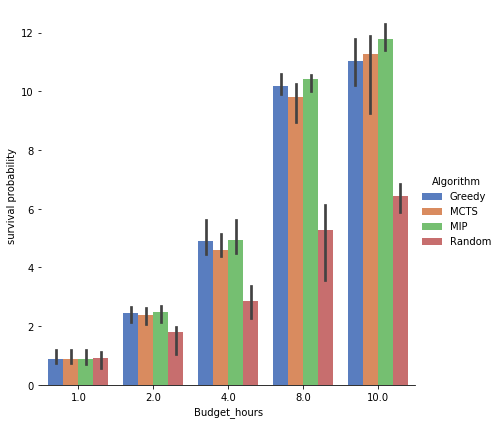

In [2]:
# This is a bar plot
fig = plt.figure(figsize=(10,10), dpi=160, facecolor='w')
g = sns.catplot(x="Budget_hours", y="Score", hue="Algorithm", data=df.query("Budget_hours < 12"),
                height=6, kind="bar", palette="muted", estimator=np.median)
g.despine(left=True)
g.set_ylabels("survival probability")

plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'ylabels'

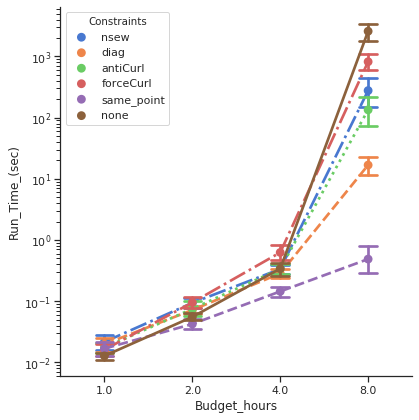

In [66]:
# # # This is line plot for time
# dataPath = 'data/budget_test_all_no_rand.csv'
dataPath= 'data/constraint_mip_backup.csv'
file_path = os.path.join(os.path.abspath('..'), dataPath)
df = pd.read_csv(file_path)
nsewConstraint = ['Algorithm', 'Map_Center', 'Start', 'Score', 'Run_Time_(sec)', 'Budget_hours', 'Constraints']
df = df.filter(nsewConstraint)

# fig = plt.figure(figsize=(10,10), dpi=160, facecolor='w')
g = sns.catplot(x="Budget_hours", y="Run_Time_(sec)", hue="Constraints",
                capsize=.2, palette="muted", height=6, aspect=1,
                kind="point", data=df.query("Budget_hours < 10"), log=True, legend_out=False, linestyles=['-.','--',':','-.','--','-'])
g.set(yscale="log")
# g.despine(left=True)
# g.set_ylabels("Run Time (Seconds)")
# g.set_xlabels("Budget(Hours)")
# h = plt.gca()
# h.ylabels("Test")

# lg = plt.legend(labels=['a','b','c','d','e','f'], loc='best')
# plt.legend(loc='upper left')

plt.show()

# g.savefig('/home/mlfrantz/Documents/MIP_Research/mip_research/Pictures/' + 'constraint_compare_time.eps', format='eps')


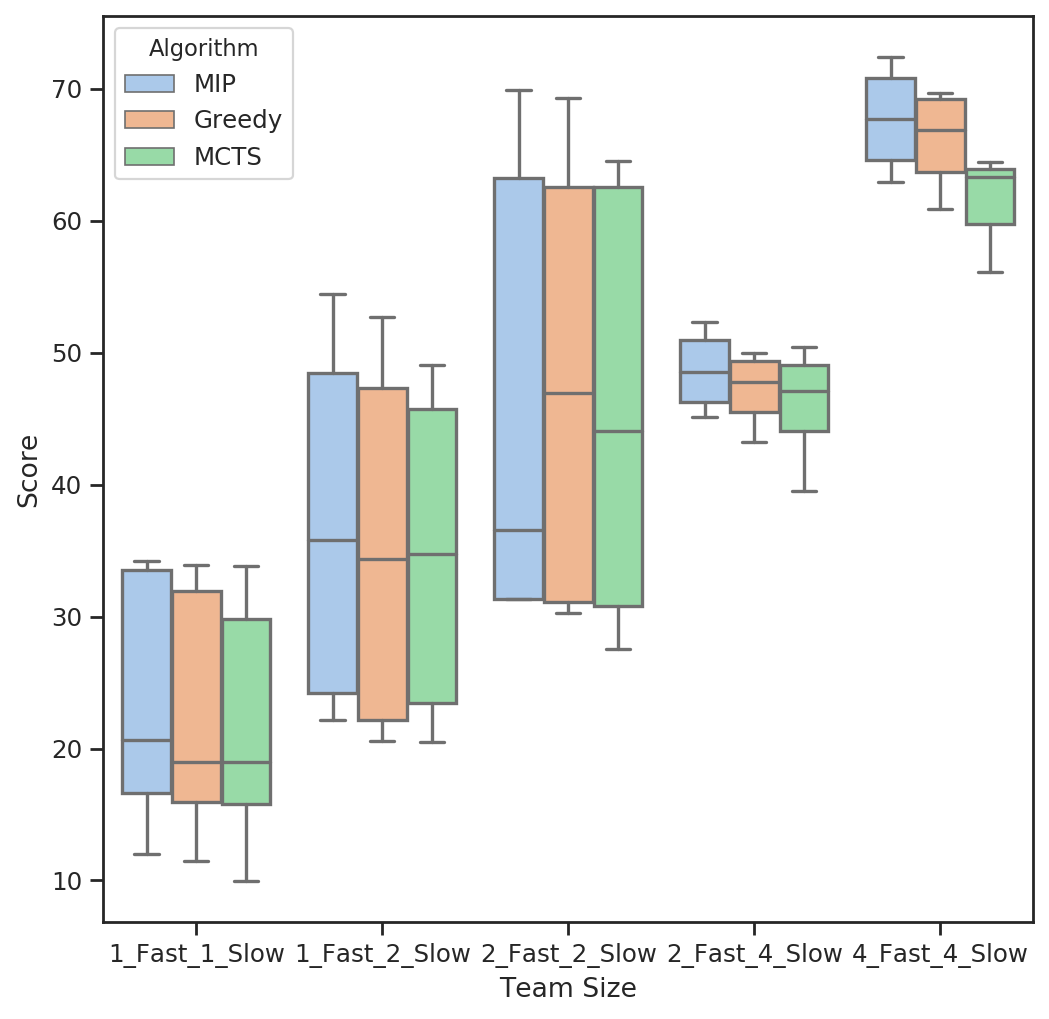

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [73]:
# This is box and whisker plot for time varying map testing
# dataPath = 'data/budget_test_all_no_rand.csv'
# dataPath= 'data/time_vary_test.csv'
dataPath= 'data/team_test_heterogenous_2.csv'

file_path = os.path.join(os.path.abspath('..'), dataPath)
df = pd.read_csv(file_path)
nsewConstraint = ['Algorithm', 'Map_Center', 'Start', 'Score', 'Run_Time_(sec)', 'Budget_hours', 'Constraints']
df = df.filter(nsewConstraint)

# fig = plt.figure(figsize=(10,10), dpi=160, facecolor='w')
fig = plt.figure(figsize=(7.5,7.5), dpi=160, facecolor='w')
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Constraints", y="Score",
            hue="Algorithm", data=df)
# sns.despine(offset=10, trim=True)

# g.despine(left=True)
# plt.ylabels("Run Time (Seconds)")
# g.set_xlabels("Budget(Hours)")
h = plt.gca()
h.set_xlabel("Team Size")
# h = plt.gca().get_lines()
# lg = plt.legend(handles=h, labels=['a','b','c','d','e','f'], loc='best')
# plt.legend(loc='upper left')

plt.show()

fig.savefig('/home/frantz/Documents/MIP_Research/mip_research/Pictures/' + 'team_hetero_score.eps', format='eps')


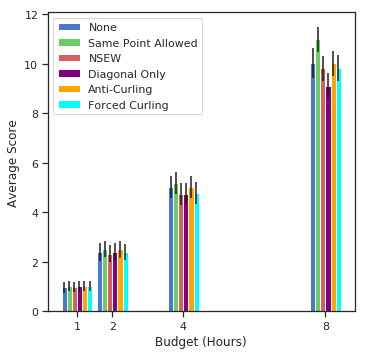

In [7]:
# Used for comparison on just MIP algorithm with different constraints
dataPath = 'data/single_constraint_compare.csv'

file_path = os.path.join(os.path.abspath('..'), dataPath)
df = pd.read_csv(file_path)
nsewConstraint = ['Algorithm', 'Start', 'Score', 'Run_Time_(sec)', 'Budget_hours', 'Constraints']
df = df.filter(nsewConstraint)

mip_none = df.query("Algorithm == 'MIP' and Constraints == 'none'")
mip_same = df.query("Algorithm == 'MIP' and Constraints == 'same_point'")
mip_nsew = df.query("Algorithm == 'MIP' and Constraints == '_nsew'")
mip_diag = df.query("Algorithm == 'MIP' and Constraints == '_diag'")
mip_anti = df.query("Algorithm == 'MIP' and Constraints == '_antiCurl'")
mip_force = df.query("Algorithm == 'MIP' and Constraints == '_forceCurl'")

values = []
budget = [1, 2, 4, 8]
for b in budget:
    for a in [mip_none, mip_same, mip_nsew, mip_diag, mip_anti, mip_force]:
        mean = np.mean(a.loc[a["Budget_hours"] == b])[0]
        error = np.std(a.loc[a["Budget_hours"] == b])[0]/np.sqrt(len(a.loc[a["Budget_hours"] == b].columns))
        # print(mean, error)
        if a is mip_none:
            algorithm = "None"
        elif a is mip_same:
            algorithm = "same_point"
        elif a is mip_nsew:
            algorithm = "nsew"
        elif a is mip_diag:
            algorithm = "diag"
        elif a is mip_anti:
            algorithm = "anti"
        elif a is mip_force:
            algorithm = "force"


        values.append((algorithm, mean, error, b))

columns = ["Algorithm", "Mean", "Std_Error", "Budget_hours"]
budget_df = pd.DataFrame(values, columns=columns)

# for b in budget:
#     temp = budget_df.loc[budget_df["Budget_hours"] == b]
#     mean_min = np.min(temp["Mean"])
#     std_min = np.min(temp["Std_Error"])
#     temp["Mean"] = (temp["Mean"]/mean_min)*100 - 100
#     budget_df.loc[budget_df["Budget_hours"] == b] = temp

width = 1/7
fig, ax = plt.subplots(figsize=(5.5,5.5))
plt.rcParams.update({'font.size':20})
budget = np.array(budget)
rect_none = ax.bar(budget-2.5*width, budget_df.loc[budget_df["Algorithm"] == "None"]["Mean"], width, color='b', yerr=budget_df.loc[budget_df["Algorithm"] == "None"]["Std_Error"])
rect_same = ax.bar(budget-1.5*width, budget_df.loc[budget_df["Algorithm"] == "same_point"]["Mean"], width, color='g', yerr=budget_df.loc[budget_df["Algorithm"] == "same_point"]["Std_Error"])
rect_nsew = ax.bar(budget-width/2, budget_df.loc[budget_df["Algorithm"] == "nsew"]["Mean"], width, color='r', yerr=budget_df.loc[budget_df["Algorithm"] == "same_point"]["Std_Error"])
rect_diag = ax.bar(budget+width/2, budget_df.loc[budget_df["Algorithm"] == "diag"]["Mean"], width, color='purple', yerr=budget_df.loc[budget_df["Algorithm"] == "same_point"]["Std_Error"])
rect_anti = ax.bar(budget+1.5*width, budget_df.loc[budget_df["Algorithm"] == "anti"]["Mean"], width, color='orange', yerr=budget_df.loc[budget_df["Algorithm"] == "same_point"]["Std_Error"])
rect_force = ax.bar(budget+2.5*width, budget_df.loc[budget_df["Algorithm"] == "force"]["Mean"], width, color='cyan', yerr=budget_df.loc[budget_df["Algorithm"] == "same_point"]["Std_Error"])

ax.set_ylabel("Average Score")
ax.set_xlabel("Budget (Hours)")
ax.set_xticks(budget)
ax.legend((rect_none[0],rect_same[0], rect_nsew[0],rect_diag[0],rect_anti[0], rect_force[0]), ('None', 'Same Point Allowed', 'NSEW', "Diagonal Only", 'Anti-Curling', 'Forced Curling'))

plt.show()

fig.savefig('/home/mlfrantz/Documents/MIP_Research/mip_research/Pictures/' + 'constraint_compare.eps', format='eps')


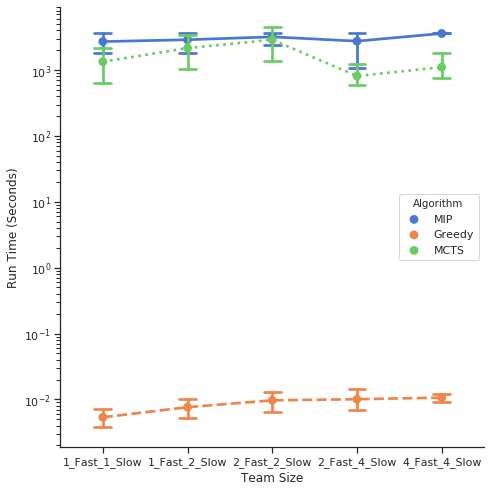

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [81]:
# This is line plot for time varying map testing
# dataPath = 'data/budget_test_all_no_rand.csv'
# dataPath= 'data/time_vary_test.csv'
dataPath= 'data/team_test_heterogenous_2.csv'

file_path = os.path.join(os.path.abspath('..'), dataPath)
df = pd.read_csv(file_path)
nsewConstraint = ['Algorithm', 'Map_Center', 'Start', 'Score', 'Run_Time_(sec)', 'Budget_hours', 'Constraints']
df = df.filter(nsewConstraint)

# fig = plt.figure(figsize=(10,10), dpi=160, facecolor='w')
g = sns.catplot(x="Constraints", y="Run_Time_(sec)", hue="Algorithm",
                capsize=.2, palette="muted", height=7, aspect=1,
                kind="point", data=df, log=True, legend_out=False, linestyles=['-','--',":"])#,':','-.','--','-'])
# g = sns.catplot(x="Budget_hours", y="Run_Time_(sec)", hue="Algorithm",
#                 capsize=.2, palette="muted", height=6, aspect=1,
#                 kind="point", data=df, log=True, legend_out=False, linestyles=['-','--'])#,':','-.','--','-'])
g.set(yscale="log")
# g.despine(left=True)
g.set_ylabels("Run Time (Seconds)")
g.set_xlabels("Team Size")
# h = plt.gca().get_lines()
# lg = plt.legend(handles=h, labels=['a','b','c','d','e','f'], loc='best')
# plt.legend(loc='upper left')

plt.show()

g.savefig('/home/frantz/Documents/MIP_Research/mip_research/Pictures/' + 'team_hetero_time.eps', format='eps')


In [39]:
# Used for comparison

dataPath = 'data/single_constraint_compare.csv'

file_path = os.path.join(os.path.abspath('..'), dataPath)
df = pd.read_csv(file_path)
nsewConstraint = ['Algorithm', 'Start', 'Score', 'Run_Time_(sec)', 'Budget_hours', 'Constraints']
df = df.filter(nsewConstraint)

mip_none = df.query("Algorithm == 'MIP' and Constraints == 'none'")
mip_same = df.query("Algorithm == 'MIP' and Constraints == 'same_point'")
mip_nsew = df.query("Algorithm == 'MIP' and Constraints == '_nsew'")
mip_diag = df.query("Algorithm == 'MIP' and Constraints == '_diag'")

greedy_none = df.query("Algorithm == 'Greedy' and Constraints == 'none'")
greedy_same = df.query("Algorithm == 'Greedy' and Constraints == 'same_point'")
greedy_nsew = df.query("Algorithm == 'Greedy' and Constraints == '_nsew'")
greedy_diag = df.query("Algorithm == 'Greedy' and Constraints == '_diag'")

mcts_none = df.query("Algorithm == 'MCTS' and Constraints == 'none'")
mcts_same = df.query("Algorithm == 'MCTS' and Constraints == 'same_point'")
mcts_nsew = df.query("Algorithm == 'MCTS' and Constraints == '_nsew'")
mcts_diag = df.query("Algorithm == 'MCTS' and Constraints == '_diag'")

values = []
budget = [1, 2, 4, 8]
Jupyter Notebook
plotting_notebook Last Checkpoint: 17 hours ago (autosaved) Current Kernel Logo 

Python 3

    File
    Edit
    View
    Insert
    Cell
    Kernel
    Help

#!/home/mlfrantz/miniconda3/bin/python3.7

​

"""

This code is specifically for plotting the results of my research testing.

"""

​

import sys

import os

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import pdb

from scipy import stats

​

def normalized(x, **kws):

    # This function scales the data between 0-1. the 'index' variable is to select

    # a specific time frame to normalize to.

    x_min = np.min(x)

    x_max = np.max(x)

    return (x - x_min) / (x_max - x_min)

​

dataPath = 'data/budget_test_all.csv'

# dataPath = 'data/constraint_test_all.csv'

# dataPath = 'data/single_constraint_compare.csv'

​

file_path = os.path.join(os.path.abspath('..'), dataPath)

df = pd.read_csv(file_path)

nsewConstraint = ['Algorithm', 'Start', 'Score', 'Run_Time_(sec)', 'Budget_hours', 'Constraints']

df = df.filter(nsewConstraint)

# This is a cat and wiskers plot

​

fig = plt.figure(figsize=(10,10), dpi=160, facecolor='w')

sns.set(style="ticks", palette="pastel")

sns.boxplot(x="Budget_hours", y="Score",

            hue="Algorithm", data=df.query("Budget_hours < 12"))

sns.despine(offset=10, trim=True)

​

plt.show()


for b in budget:
    for a in [mip_none, mip_same, mip_nsew, mip_diag, ]:
        mean = np.mean(a.loc[a["Budget_hours"] == b])[0]
        error = np.std(a.loc[a["Budget_hours"] == b])[0]/np.sqrt(len(a.loc[a["Budget_hours"] == b].columns))
        # print(mean, error)
       
        if str(a.iloc[0]['Constraints']) == 'none':
            algorithm = "None"
        elif str(a.iloc[0]['Constraints']) == 'same_point':
            algorithm = "same_point"
        elif str(a.iloc[0]['Constraints']) == '_nsew':
            algorithm = "nsew"
        elif str(a.iloc[0]['Constraints']) == '_diag':
            algorithm = "diag"


        values.append((algorithm, mean, error, b))

columns = ["Algorithm", "Mean", "Std_Error", "Budget_hours"]
budget_df = pd.DataFrame(values, columns=columns)

# # for b in budget:
# #     temp = budget_df.loc[budget_df["Budget_hours"] == b]
# #     mean_min = np.min(temp["Mean"])
# #     std_min = np.min(temp["Std_Error"])
# #     temp["Mean"] = (temp["Mean"]/mean_min)*100 - 100
# #     budget_df.loc[budget_df["Budget_hours"] == b] = temp

# width = 1/7
# fig, ax = plt.subplots(figsize=(10,10))
# plt.rcParams.update({'font.size':14})
# plt.rc('font', size=20)

# budget = np.array(budget)
# # print(budget_df)
# # rect_mip = ax.bar(budget-width/2, budget_df.loc[budget_df["Algorithm"] == "None"]["Mean"], width, color='b', yerr=budget_df.loc[budget_df["Algorithm"] == "None"]["Std_Error"])
# # rect_constraint = ax.bar(budget+width/2, budget_df.loc[budget_df["Algorithm"] == "Constraint"]["Mean"], width, color='g', yerr=budget_df.loc[budget_df["Algorithm"] == "Constraint"]["Std_Error"])
# # rect_greedy = ax.bar(budget, budget_df.loc[budget_df["Algorithm"] == "Greedy"]["Mean"], width, color='orange', yerr=budget_df.loc[budget_df["Algorithm"] == "Greedy"]["Std_Error"])
# # rect_mcts = ax.bar(budget+width, budget_df.loc[budget_df["Algorithm"] == "MCTS"]["Mean"], width, color='g', yerr=budget_df.loc[budget_df["Algorithm"] == "MCTS"]["Std_Error"])
# rect_none = ax.bar(budget-2.5*width, budget_df.loc[budget_df["Algorithm"] == "None"]["Mean"], width, color='b', yerr=budget_df.loc[budget_df["Algorithm"] == "None"]["Std_Error"])
# rect_same = ax.bar(budget-1.5*width, budget_df.loc[budget_df["Algorithm"] == "same_point"]["Mean"], width, color='g', yerr=budget_df.loc[budget_df["Algorithm"] == "same_point"]["Std_Error"])
# rect_nsew = ax.bar(budget-width/2, budget_df.loc[budget_df["Algorithm"] == "nsew"]["Mean"], width, color='r', yerr=budget_df.loc[budget_df["Algorithm"] == "same_point"]["Std_Error"])
# rect_diag = ax.bar(budget+width/2, budget_df.loc[budget_df["Algorithm"] == "diag"]["Mean"], width, color='purple', yerr=budget_df.loc[budget_df["Algorithm"] == "same_point"]["Std_Error"])
# rect_anti = ax.bar(budget+1.5*width, budget_df.loc[budget_df["Algorithm"] == "anti"]["Mean"], width, color='orange', yerr=budget_df.loc[budget_df["Algorithm"] == "same_point"]["Std_Error"])
# rect_force = ax.bar(budget+2.5*width, budget_df.loc[budget_df["Algorithm"] == "force"]["Mean"], width, color='cyan', yerr=budget_df.loc[budget_df["Algorithm"] == "same_point"]["Std_Error"])

# ax.set_ylabel("Average Score")
# ax.set_xlabel("Budget (Hours)")
# ax.set_xticks(budget)
# # ax.legend((rect_mip[0],rect_greedy[0],rect_mcts[0]), ('MIP', 'Greedy', 'MCTS'))
# ax.legend((rect_none[0],rect_same[0], rect_nsew[0],rect_diag[0],rect_anti[0], rect_force[0]), ('None', 'Same Point Allowed', 'NSEW', "Diagonal Only", 'Anti-Curling', 'Forced Curling'))

# # plt.show()

none
None
same_point
_nsew
_diag
none
None
same_point
_nsew
_diag
none
None
same_point
_nsew
_diag
none
None
same_point
_nsew
_diag


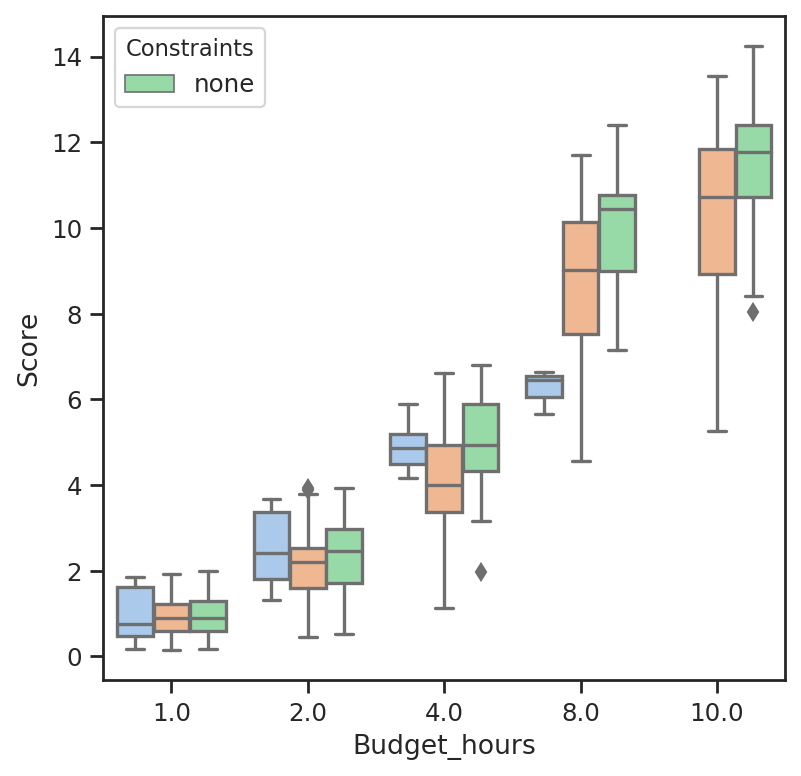

In [57]:
# This is box and wisker plot for testing lanwmower constraints
# dataPath = 'data/budget_test_all_no_rand.csv'
dataPath= 'data/constraint_test_force_curl.csv'
file_path = os.path.join(os.path.abspath('..'), dataPath)
df = pd.read_csv(file_path)
nsewConstraint = ['Algorithm', 'Map_Center', 'Start', 'Score', 'Run_Time_(sec)', 'Budget_hours', 'Constraints']
df = df.filter(nsewConstraint)

# fig = plt.figure(figsize=(10,10), dpi=160, facecolor='w')
plt.figure(figsize=(5.5,5.5), dpi=160, facecolor='w')
sns.set(style="ticks", palette="pastel")
g = sns.boxplot(x="Budget_hours", y="Score",
            hue="Constraints", data=df)
# sns.despine(offset=10, trim=True)

# g.despine(left=True)
# plt.ylabels("Run Time (Seconds)")
# plt.xlabels("Budget(Hours)")
# h = plt.gca().get_lines()
# lg = plt.legend(handles=h, labels=['a','b','c','d','e','f'], loc='best')
# plt.legend(loc='upper left')

plt.show()

# fig.savefig('/home/frantz/Documents/MIP_Research/mip_research/Pictures/' + 'time_vary_score.eps', format='eps')

/home/frantz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/frantz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


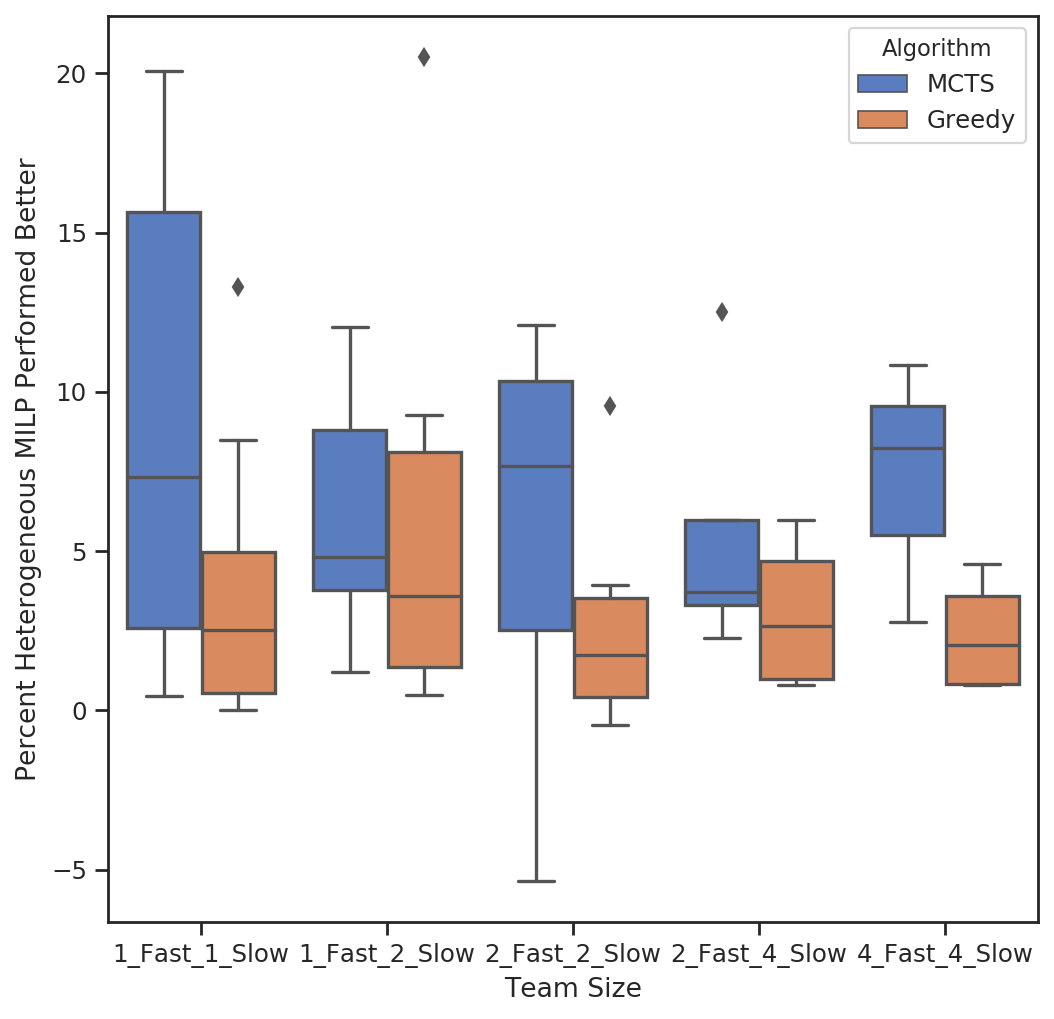

In [85]:
# Used for comparison for all algorithms
# dataPath = 'data/budget_test_all.csv'
# dataPath = 'data/constraint_test_all.csv'
# dataPath = 'data/constraint_test_force_curl.csv'
dataPath= 'data/team_test_heterogenous_2.csv'

file_path = os.path.join(os.path.abspath('..'), dataPath)
df = pd.read_csv(file_path)
nsewConstraint = ['Algorithm', 'Map_Center', 'Start', 'Score', 'Run_Time_(sec)', 'Budget_hours', 'Constraints']
df = df.filter(nsewConstraint)

# mip = df.query("Algorithm == 'MIP' and Constraints == '_diag'")
# mcts = df.query("Algorithm == 'MCTS' and Constraints == '_diag'")
# greedy = df.query("Algorithm == 'Greedy' and Constraints == '_diag'")
# random_alg = df.query("Algorithm == 'Random'")

# This is forced curl testing
# mip = df.query("Constraints == 'none'")
# nsew = df.query("Constraints == '_nsew_forceCurl'")
# diag = df.query("Constraints == '_diag_forceCurl'")
# algorithms = [nsew, diag]

# This is forced heterogenous team testing

mip = df.query("Algorithm == 'MIP'")
mcts = df.query("Algorithm == 'MCTS'")
greedy = df.query("Algorithm == 'Greedy'")
algorithms = [mcts, greedy]

values = []
budget = [2, 4]
map_center = ['xLon: -91.19000, yLat: 28.82000', \
              'xLon: -91.70000, yLat: 29.00000', \
              'xLon: -92.70000, yLat: 28.80000', \
              'xLon: -93.25000, yLat: 28.75000', \
              'xLon: -96.50000, yLat: 25.00000']

team_size = ['1_Fast_1_Slow','1_Fast_2_Slow','2_Fast_2_Slow','2_Fast_4_Slow','4_Fast_4_Slow']

for b in budget:
    for alg in algorithms:
        for map_c in map_center:
            for team in team_size:
                mip_value = mip.loc[mip["Budget_hours"] == b][mip["Map_Center"] == map_c][mip["Constraints"] == team]
                alg_value = alg.loc[alg["Budget_hours"] == b][alg["Map_Center"] == map_c][alg["Constraints"] == team]
               
                if alg is mcts:
                    algorithm = "MCTS"
                elif alg is greedy:
                    algorithm = "Greedy"
#                 elif alg is random_alg:
#                     algorithm = "Random"
#                 if alg is nsew:
#                     algorithm = "Forced Curl+NSEW"
#                 elif alg is diag:
#                     algorithm = "Forced Curl+Diagonal"
                
                try:
                    mip_num = mip_value.to_numpy()[0][3] # This will get the Score for MIP
                    alg_num = alg_value.to_numpy()[0][3] # This will get the Score for the algorithm being compared
#                     print(mip_num)
#                     print(b)
                    values.append((algorithm, ((mip_num-alg_num)/mip_num)*100 , b, team))
                except:
                    continue
                
columns = ["Algorithm", "Percent_Improvement", "Budget_hours", "Team_size"]
budget_df = pd.DataFrame(values, columns=columns)
# print(budget_df.head)

# # for b in budget:
# #     temp = budget_df.loc[budget_df["Budget_hours"] == b]
# #     mean_min = np.min(temp["Mean"])
# #     std_min = np.min(temp["Std_Error"])
# #     temp["Mean"] = (temp["Mean"]/mean_min)*100 - 100
# #     budget_df.loc[budget_df["Budget_hours"] == b] = temp

# width = 1/7
# fig, ax = plt.subplots(figsize=(10,10))
# plt.rcParams.update({'font.size':14})
# budget = np.array(budget)


# for b in budget:
#     box_mip = ax.boxplot(budget_df.loc[budget_df["Algorithm"] == "MCTS"][budget_df["Budget_Hours" == b]]["Percent_Improvement"], labels=b, vert=True, notch=True)
# # rect_same = ax.bar(budget-1.5*width, budget_df.loc[budget_df["Algorithm"] == "same_point"]["Mean"], width, color='g', yerr=budget_df.loc[budget_df["Algorithm"] == "same_point"]["Std_Error"])
# # rect_nsew = ax.bar(budget-width/2, budget_df.loc[budget_df["Algorithm"] == "nsew"]["Mean"], width, color='r', yerr=budget_df.loc[budget_df["Algorithm"] == "same_point"]["Std_Error"])
# # rect_diag = ax.bar(budget+width/2, budget_df.loc[budget_df["Algorithm"] == "diag"]["Mean"], width, color='purple', yerr=budget_df.loc[budget_df["Algorithm"] == "same_point"]["Std_Error"])

# ax.set_ylabel("Average Score")
# ax.set_xlabel("Budget (Hours)")
# ax.set_xticks(budget)
# # ax.legend((rect_none[0],rect_same[0], rect_nsew[0],rect_diag[0],rect_anti[0], rect_force[0]), ('None', 'Same Point Allowed', 'NSEW', "Diagonal Only", 'Anti-Curling', 'Forced Curling'))

# print(budget_df.loc[budget_df["Budget_hours"] == 1][budget_df["Algorithm"]=='MCTS'].describe())
# print(budget_df.loc[budget_df["Budget_hours"] == 2][budget_df["Algorithm"]=='MCTS'].describe())
# print(budget_df.loc[budget_df["Budget_hours"] == 4][budget_df["Algorithm"]=='MCTS'].describe())
# print(budget_df.loc[budget_df["Budget_hours"] == 8][budget_df["Algorithm"]=='MCTS'].describe())

# print(budget_df.loc[budget_df["Budget_hours"] == 1][budget_df["Algorithm"]=='Greedy'].describe())
# print(budget_df.loc[budget_df["Budget_hours"] == 2][budget_df["Algorithm"]=='Greedy'].describe())
# print(budget_df.loc[budget_df["Budget_hours"] == 4][budget_df["Algorithm"]=='Greedy'].describe())
# print(budget_df.loc[budget_df["Budget_hours"] == 8][budget_df["Algorithm"]=='Greedy'].describe())


fig = plt.figure(figsize=(7.5,7.5), dpi=160, facecolor='w')
plt.rcParams.update({'font.size':20})
sns.set(style="ticks", palette="muted")
sns.boxplot(x="Team_size", y="Percent_Improvement", hue="Algorithm", data=budget_df)
plt.ylabel('Percent Heterogeneous MILP Performed Better')
plt.xlabel('Team Size')
# plt.ylim([-20,40])
# sns.despine(offset=10, trim=True)
#
plt.savefig('/home/frantz/Documents/MIP_Research/mip_research/Pictures/' + 'team_hetero_score.eps', format='eps')
plt.show()